<a href="https://colab.research.google.com/github/IgPant/PCA-Audio-Compression/blob/main/Projeto_COCADA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Compressão otimizada de áudio.


####Representação de faixas de áudio por meio de uma matriz espectrograma. Redução de posto atravéz da análize dos componentes principais.

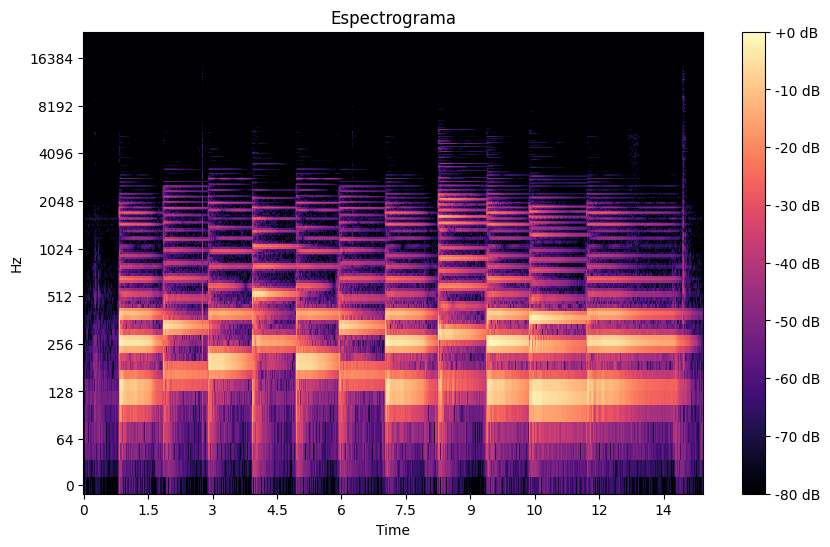

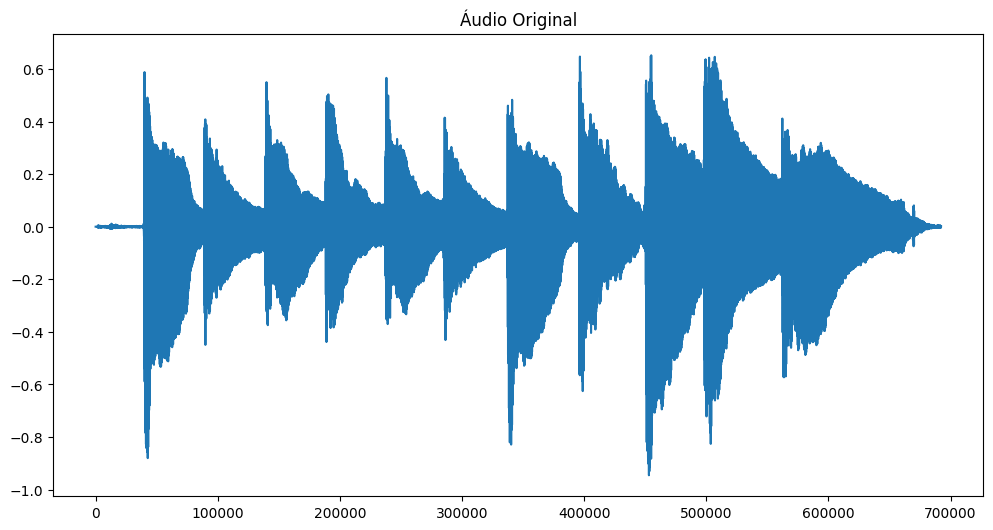

Matriz do Espectrograma (S):
[[-8.48202308e-06+0.00000000e+00j -6.51543378e-05+0.00000000e+00j
  -1.86937917e-02+0.00000000e+00j ... -5.16608218e-03+0.00000000e+00j
  -1.14146732e-01+0.00000000e+00j -1.20873265e-01+0.00000000e+00j]
 [-3.76705430e-06-7.59960631e-06j -1.73456465e-05-6.43914655e-06j
   4.08452842e-03-2.68045999e-02j ...  1.11978211e-01-1.07578196e-01j
  -9.52290073e-02-1.44670587e-02j  1.99969068e-01+2.33138185e-02j]
 [ 5.13595842e-06-6.75030697e-06j -7.82259522e-05+2.48271481e-05j
   3.94797809e-02-9.53163672e-03j ... -6.80638909e-01+3.44849795e-01j
   4.99877542e-01+2.51099110e-01j -1.33905515e-01-2.27209941e-01j]
 ...
 [ 5.13595842e-06+6.75030697e-06j -2.04614826e-05-1.76953290e-05j
  -1.80369061e-05-8.38128617e-05j ...  1.73381311e-04+2.61725567e-04j
   2.50607496e-04-4.30557935e-04j -5.58023748e-04+2.58442189e-04j]
 [-3.76705430e-06+7.59960631e-06j  2.09488844e-05+1.55365942e-05j
   6.78885990e-05-4.43950994e-05j ... -2.37989851e-04-2.26914737e-04j
   6.49275353e-06+

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.io import wavfile
import soundfile as sf
from sklearn.decomposition import PCA

def gera_spectrograma(arquivo):
    y, sr = librosa.load(arquivo, sr=None)

    S = librosa.stft(y)
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

    # Imprime o espectrograma
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Espectrograma')
    plt.show()

    return S, sr

# Testa a função gera_spectrograma
arquivo = '/content/drive/MyDrive/Projcocada/Pasta sem título/Voz-240717_001038.wav'
S, sr = gera_spectrograma(arquivo)

# Plota o gráfico do áudio original
original_audio, _ = librosa.load(arquivo, sr=None)
plt.figure(figsize=(12, 6))
plt.plot(original_audio)
plt.title('Áudio Original')
plt.show()

# Mostra a matriz do espectrograma
print("Matriz do Espectrograma (S):")
print(S)

Matriz do Espectrograma após PCA (S_pca):
[[-3.2244623e-04-2.8189144e-11j -3.2199919e-04-2.8150064e-11j
  -5.1687658e-04-4.5186785e-11j ... -2.2736788e-03-1.9877132e-10j
  -2.4943650e-03-2.1806432e-10j -1.6556680e-03-1.4474309e-10j]
 [ 2.4825903e-02+5.0083451e-02j  5.2406136e-02+1.9454498e-02j
  -8.3269496e-03+5.4645360e-02j ... -3.5996813e-02+3.4582373e-02j
   4.8876278e-02+7.4252165e-03j -5.1347673e-02-5.9864777e-03j]
 [-3.6312476e-02+4.7726311e-02j  5.7162296e-02-1.8142022e-02j
  -5.7203747e-02+1.3810749e-02j ...  4.3856498e-02-2.2220161e-02j
  -4.2933438e-02-2.1566378e-02j  2.6645223e-02+4.5211442e-02j]
 ...
 [ 1.3856162e-04+1.8211467e-04j -1.7308633e-04-1.4968710e-04j
  -4.8141475e-05-2.2370111e-04j ...  1.2633577e-04+1.9070855e-04j
   1.1507819e-04-1.9771091e-04j -2.0759474e-04+9.6145108e-05j]
 [-1.0048612e-04+2.0271938e-04j  1.8173268e-04+1.3478077e-04j
   1.8935863e-04-1.2382926e-04j ... -1.6374404e-04-1.5612405e-04j
   2.3553516e-06+2.2623946e-04j  2.2295005e-04-3.8472335e-05j

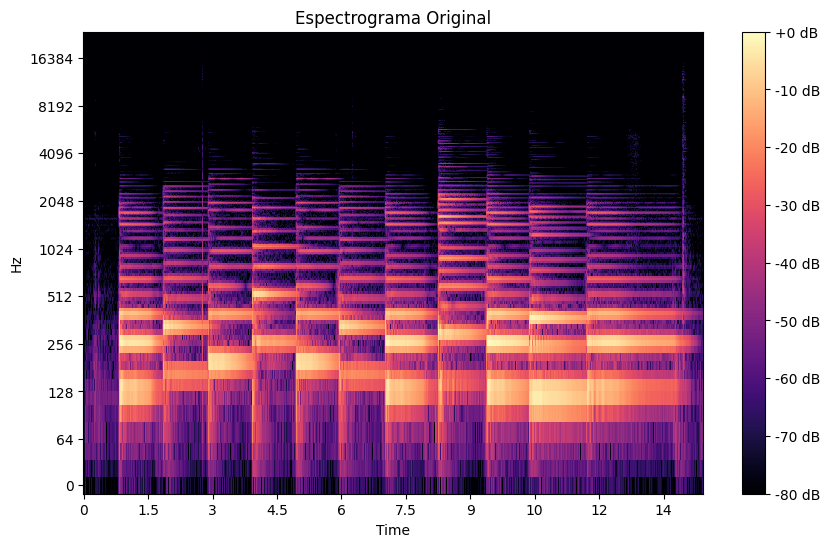

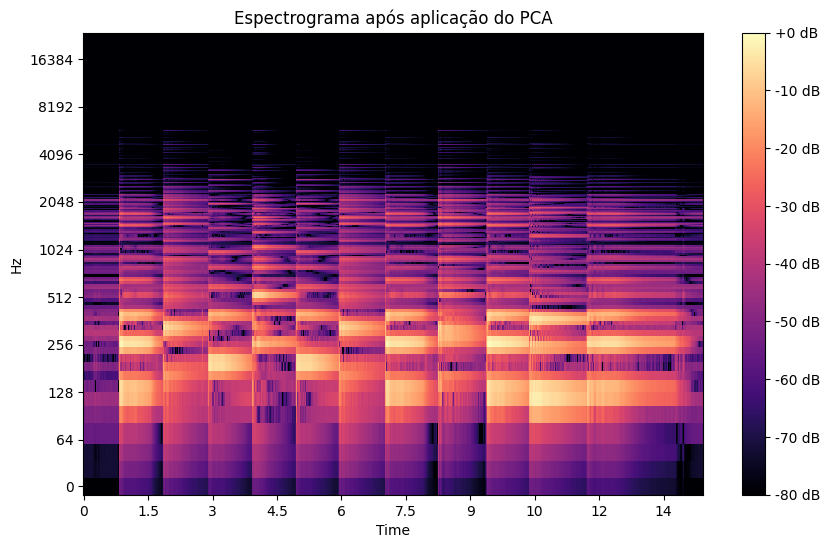

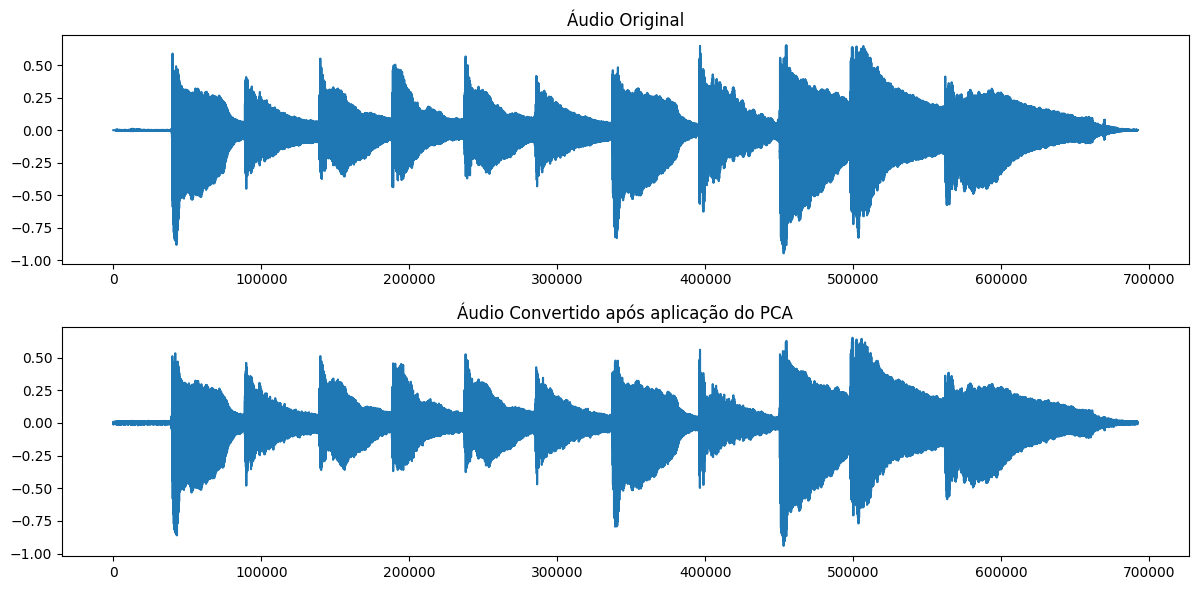

In [ ]:
from sklearn.decomposition import PCA

def reducao_PCA(S, pca_index):
    magnitude = np.abs(S)
    phase = np.angle(S)
    magnitude_t = magnitude.T
    pca = PCA(n_components=pca_index)
    magnitude_pca = pca.fit_transform(magnitude_t)
    magnitude_reconstructed = pca.inverse_transform(magnitude_pca)
    magnitude_reconstructed = magnitude_reconstructed.T

    # Reconstruir o espectrograma usando a fase original
    S_reconstructed = magnitude_reconstructed * np.exp(1j * phase)

    return S_reconstructed

# Teste da função reducao_PCA
pca_index = 0.90  # Razão do PCA, % do posto mantido
S_pca = reducao_PCA(S, pca_index)

print("Matriz do Espectrograma após PCA (S_pca):")
print(S_pca)

# Plotar o espectrograma original
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma Original')
plt.show()

# Plotar o espectrograma após aplicação do PCA
S_pca_db = librosa.amplitude_to_db(np.abs(S_pca), ref=np.max)
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_pca_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma após aplicação do PCA')
plt.show()

# Converter o espectrograma PCA de volta para áudio e salvar
output_path_pca = '/content/audio_pca_convertido.wav'
y_pca = librosa.istft(S_pca)
sf.write(output_path_pca, y_pca, sr)

# Carregar o áudio convertido após PCA
audio_pca_convertido, _ = librosa.load(output_path_pca, sr=None)

# Comparar os primeiros segundos do áudio original e do áudio após aplicação do PCA
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(original_audio)
plt.title('Áudio Original')

plt.subplot(2, 1, 2)
plt.plot(audio_pca_convertido)
plt.title('Áudio Convertido após aplicação do PCA')

plt.tight_layout()
plt.show()

Matriz do Espectrograma após PCA (S_pca):
[[-9.2265941e-02-8.06614509e-09j -9.2265941e-02-8.06614509e-09j
  -9.2312418e-02-8.07020761e-09j ... -9.2890017e-02-8.12070322e-09j
  -9.3012035e-02-8.13137024e-09j -9.2637457e-02-8.09862399e-09j]
 [-1.3263288e-01-2.67571837e-01j -2.7997175e-01-1.03932664e-01j
   4.5001321e-02-2.95319825e-01j ...  2.1621403e-01-2.07718208e-01j
  -2.9665348e-01-4.50671874e-02j  2.9733208e-01+3.46650928e-02j]
 [ 3.1172782e-01-4.09710944e-01j -4.9069700e-01+1.55736148e-01j
   5.0062376e-01-1.20866023e-01j ... -4.6151206e-01+2.33827889e-01j
   4.6276271e-01+2.32455537e-01j -2.6215976e-01-4.44830984e-01j]
 ...
 [ 1.3430549e-04+1.76520742e-04j -1.6776966e-04-1.45089187e-04j
  -4.6665416e-05-2.16842236e-04j ...  1.2250703e-04+1.84928926e-04j
   1.1159041e-04-1.91718689e-04j -2.0127853e-04+9.32198236e-05j]
 [-9.9035933e-05+1.99793794e-04j  1.7910993e-04+1.32835630e-04j
   1.8663258e-04-1.22046578e-04j ... -1.6142071e-04-1.53908841e-04j
   2.3219500e-06+2.23031122e-04j 

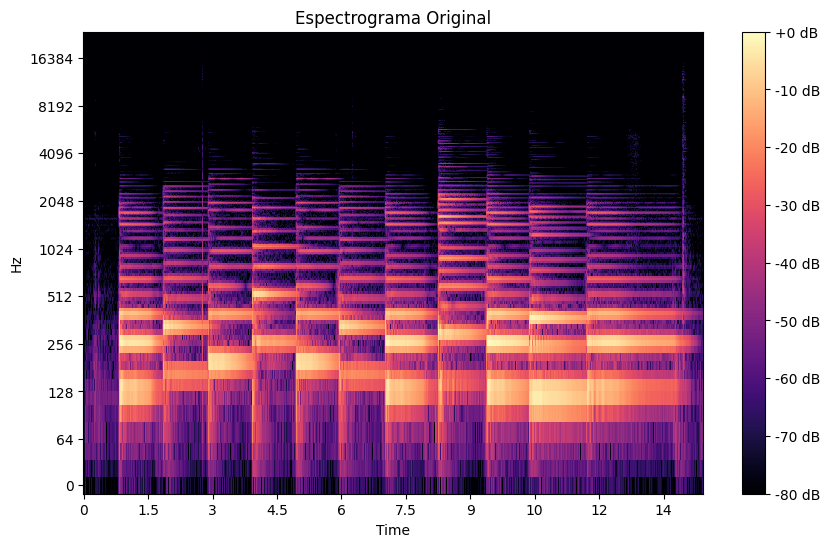

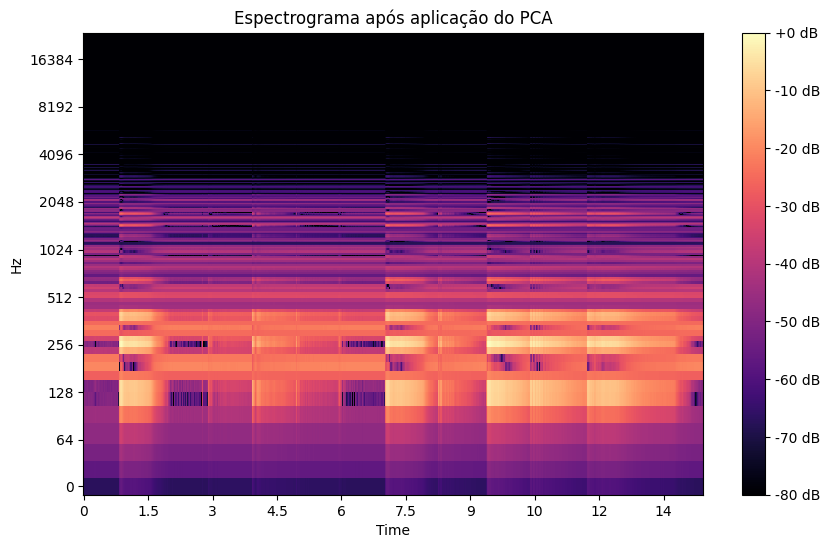

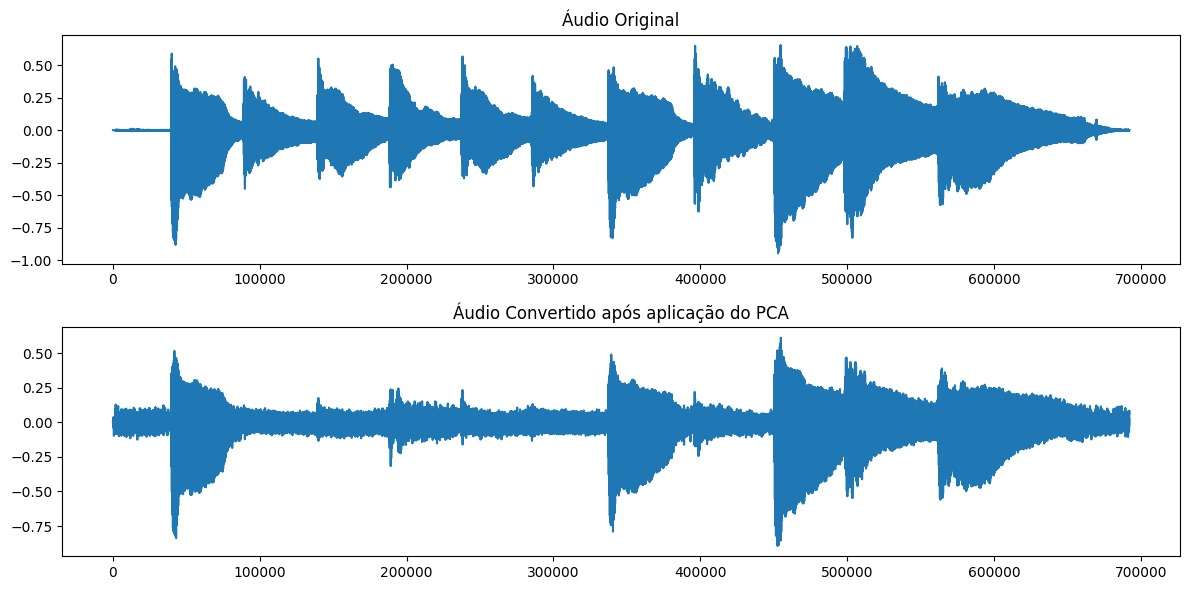

In [ ]:
from sklearn.decomposition import PCA

def reducao_PCA(S, pca_index):
    magnitude = np.abs(S)
    phase = np.angle(S)
    magnitude_t = magnitude.T
    pca = PCA(n_components=pca_index)
    magnitude_pca = pca.fit_transform(magnitude_t)
    magnitude_reconstructed = pca.inverse_transform(magnitude_pca)
    magnitude_reconstructed = magnitude_reconstructed.T

    # Reconstruir o espectrograma usando a fase original
    S_reconstructed = magnitude_reconstructed * np.exp(1j * phase)

    return S_reconstructed

# Teste da função reducao_PCA
pca_index = 0.50  # Razão do PCA, % do posto mantido
S_pca = reducao_PCA(S, pca_index)

print("Matriz do Espectrograma após PCA (S_pca):")
print(S_pca)

# Plotar o espectrograma original
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma Original')
plt.show()

# Plotar o espectrograma após aplicação do PCA
S_pca_db = librosa.amplitude_to_db(np.abs(S_pca), ref=np.max)
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_pca_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma após aplicação do PCA')
plt.show()

# Converter o espectrograma PCA de volta para áudio e salvar
output_path_pca = '/content/audio_pca_convertido.wav'
y_pca = librosa.istft(S_pca)
sf.write(output_path_pca, y_pca, sr)

# Carregar o áudio convertido após PCA
audio_pca_convertido, _ = librosa.load(output_path_pca, sr=None)

# Comparar os primeiros segundos do áudio original e do áudio após aplicação do PCA
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(original_audio)
plt.title('Áudio Original')

plt.subplot(2, 1, 2)
plt.plot(audio_pca_convertido)
plt.title('Áudio Convertido após aplicação do PCA')

plt.tight_layout()
plt.show()

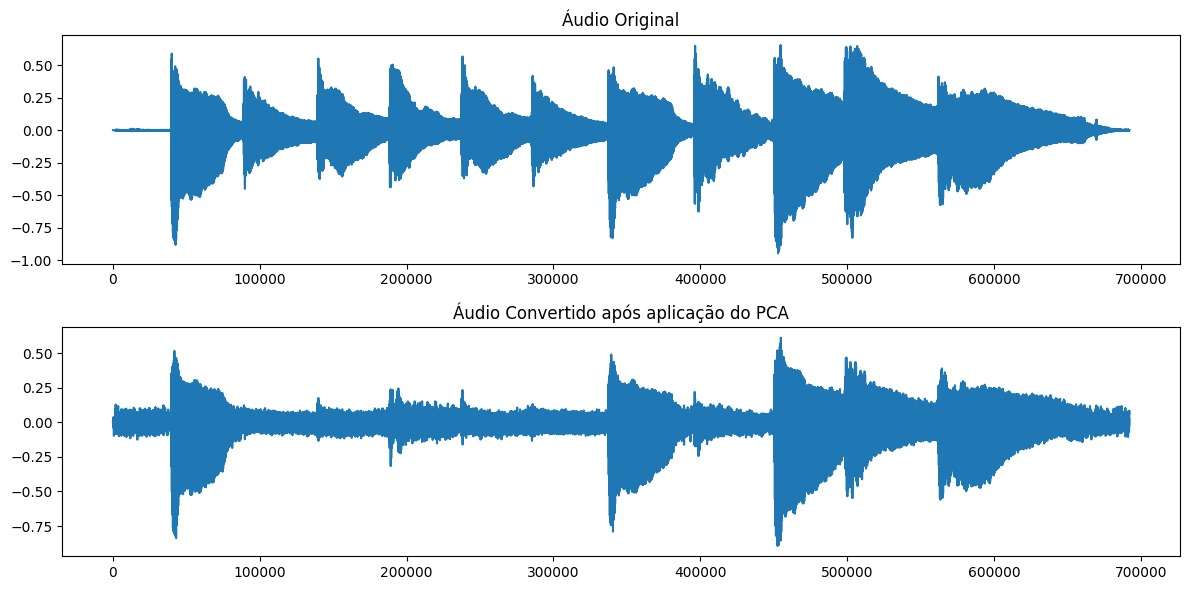

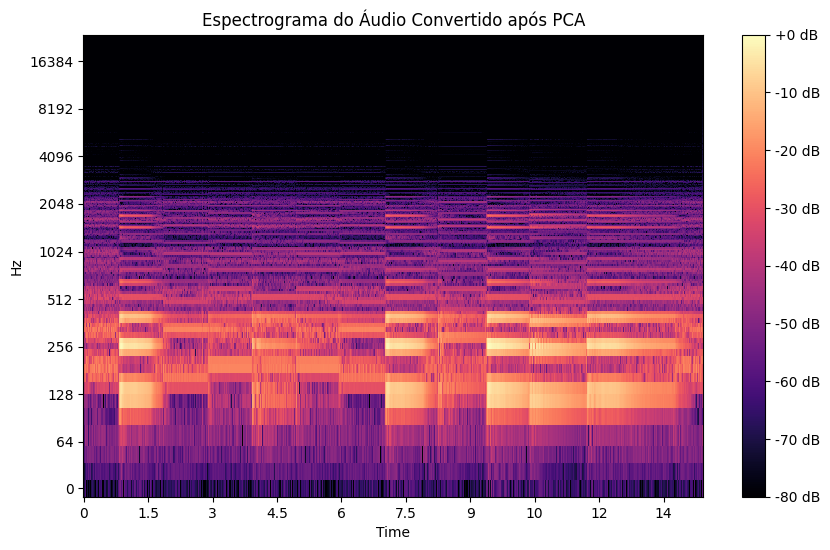

Matriz do Espectrograma Convertido após PCA (S_converted_pca):
[[ 2.03669071e-01+0.0000000e+00j  9.53382477e-02+0.0000000e+00j
  -6.24903291e-02+0.0000000e+00j ... -1.12604387e-02+0.0000000e+00j
   3.05045396e-01+0.0000000e+00j  9.17664766e-01+0.0000000e+00j]
 [-1.86268985e-01+5.5309344e-02j  1.23055018e-02-1.8436475e-01j
   3.84249277e-02+2.8233232e-02j ...  8.96259174e-02-2.8853169e-02j
   2.36704107e-02+3.3390427e-01j -8.74796689e-01+2.9614839e-01j]
 [ 6.88676536e-02-1.0818000e-01j -9.72080696e-03+2.1417330e-01j
   7.22131804e-02-2.2065398e-01j ... -7.17790484e-01+1.9064295e-01j
   2.89974809e-02+7.0830256e-01j  1.07770801e+00-7.6331806e-01j]
 ...
 [ 5.25399810e-03+1.5722415e-07j -2.48653418e-03-5.5597062e-05j
  -1.38866846e-04-1.4418428e-04j ...  2.90416278e-06+5.8871368e-04j
   1.49156861e-02-3.7123292e-04j -2.96885613e-02-2.6547152e-05j]
 [-5.32560470e-03-5.2244373e-05j -8.95392222e-05+2.7503837e-03j
   2.51502992e-04+2.6854352e-05j ... -1.74406960e-04-5.8128382e-04j
  -5.1020219

In [ ]:
def spectrogram_to_audio(S, sr, output_path):

    y = librosa.istft(S)

    sf.write(output_path, y, sr)

    return y


# Converter o espectrograma PCA de volta para áudio e salvar
output_path_pca = '/content/audio_pca_convertido.wav'
y_pca = spectrogram_to_audio(S_pca, sr, output_path_pca)

# Carregar o áudio convertido após PCA
audio_pca_convertido, _ = librosa.load(output_path_pca, sr=None)

# Comparar os primeiros segundos do áudio original e do áudio após aplicação do PCA
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(original_audio)
plt.title('Áudio Original')

plt.subplot(2, 1, 2)
plt.plot(audio_pca_convertido)
plt.title('Áudio Convertido após aplicação do PCA')

plt.tight_layout()
plt.show()

# Mostrar a matriz do espectrograma do áudio convertido
S_converted_pca = librosa.stft(audio_pca_convertido)
S_converted_pca_db = librosa.amplitude_to_db(np.abs(S_converted_pca), ref=np.max)

plt.figure(figsize=(10, 6))
librosa.display.specshow(S_converted_pca_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma do Áudio Convertido após PCA')
plt.show()

print("Matriz do Espectrograma Convertido após PCA (S_converted_pca):")
print(S_converted_pca)

plotar a distancia entre os vetores do audio original e do audio transformado em funçao da reduçao de posto

identificar o "cotovelo da curva"

colocar a especificação do problema

vetor --- amplitude no momento x



In [ ]:
import numpy as np
import librosa

def calculate_audio_distance(audio1_path, audio2_path):
    # Carregar os áudios
    y1, sr1 = librosa.load(audio1_path, sr=None)
    y2, sr2 = librosa.load(audio2_path, sr=None)

    # Verificar se as taxas de amostragem são diferentes e fazer resampling se necessário
    if sr1 != sr2:
        y2 = librosa.resample(y2, sr2, sr1)

    # Transformar os áudios em vetores
    y1 = y1.flatten()
    y2 = y2.flatten()

    # Garantir que os vetores tenham o mesmo comprimento
    min_len = min(len(y1), len(y2))
    y1 = y1[:min_len]
    y2 = y2[:min_len]

    # Calcular a distância entre os vetores
    distance = np.linalg.norm(y1 - y2)

    return distance


In [ ]:
import matplotlib.pyplot as plt

def plot_pca_distance(audio_path, output_path_template):
    # Carregar o áudio original e gerar o espectrograma
    original_audio, sr = librosa.load(audio_path, sr=None)
    S = librosa.stft(original_audio)

    distances = []
    indices = []

    # Aplicar PCA e calcular distâncias para índices de 0.01 a 1.00
    for i in np.arange(1.00, 0.00, -0.01):
        S_pca = apply_pca_to_spectrogram(S, i)
        temp_output_path = output_path_template.format(i)
        spectrogram_to_audio(S_pca, sr, temp_output_path)
        distance = calculate_audio_distance(audio_path, temp_output_path)
        indices.append(i)
        distances.append(distance)

    # Plotar o gráfico de Índice por Distância
    plt.figure(figsize=(10, 6))
    plt.plot(indices, distances, marker='o')
    plt.xlabel('Índice do PCA')
    plt.ylabel('Distância')
    plt.title('Distância entre Áudio Original e Transformado por Índice do PCA')
    plt.grid(True)
    plt.show()
